# **Abstract**
The title of my project is “Car Accident Analysis”. My name is Ashish Subedi, and my email is ass152@pitt.edu. The research question I have chosen is “Is it possible to predict when a car accident will occur based on factors such as illumination, weather, road condition, location type, speeding, and speed limit?” This research question is interesting to me because I am a young driver. I started driving at 16 and have some years of experience with driving, but by diving deeper and doing more research, I think I will be able to learn more about accidents and how to possibly avoid them in certain situations. I consider this project useful because it might show more insights on car accidents and how to avoid them (more than just the basic conditions of going too fast on a rainy day). I think drivers of all ages can benefit from this model since anyone can be in a car accident. The more educated and aware people are of unsafe driving conditions, the less accidents there will be on the roads. I think DMVs could also use a model like this for their courses on safe driving and how to avoid accidents. My overall plan is to analyze car accidents in Allegheny County by using a dataset from WPRDC to see what conditions led to the accidents. The data comes from accidents that were reported to the police from 2004 to 2022. I plan to use a regression model to predict the outcome. 

# EDA

### Title: Car Accident Analysis
### Name: Ashish Subedi
### Email: ass152@pitt.edu
### Abstract with corrections: 

    The research question I have chosen is “Is it possible to predict the number of injuries in a crash based on factors such as the month of the crash, day of the week of the crash, time of day of the crash, illumination, weather, road condition, location type, and speeding?” This research question is interesting to me because I am a young driver. I started driving at 16 and have some years of experience with driving, but by diving deeper and doing more research, I think I will be able to learn more about accidents and how to possibly avoid them in certain situations. I consider this project useful because it might show more insights on car accidents and how to avoid them (more than just the basic conditions of going too fast on a rainy day). I think drivers of all ages can benefit from this model since anyone can be in a car accident. The more educated and aware people are of unsafe driving conditions, the less accidents there will be on the roads. I think DMVs could also use a model like this for their courses on safe driving and how to avoid accidents. My overall plan is to analyze car accidents in Allegheny County by using a dataset from WPRDC to see what conditions led to the accidents. The data comes from accidents that were reported to the police from 2004 to 2022. I plan to use a regression model to predict the outcome. 

In [838]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [839]:
df = pd.read_csv('2c13021f-74a9-4289-a1e5-fe0472c89881.csv', low_memory = False)
df.head()

,_id,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,1,2004000001,11,2,2454,02454,2004,1,5,257.0,...,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD,NaN,NaN
1,2,2004000010,11,2,2440,02440,2004,1,5,1027.0,...,2.0,W,3.0,NaN,35.0,NaN,NaN,COAL VALLEY RD,NaN,NaN
2,3,2004000016,11,2,2203,02203,2004,1,5,1839.0,...,2.0,W,2.0,3082,35.0,NaN,NaN,CLINTON FRANKFORT RD,NaN,NaN
3,4,2004000022,11,2,2404,02404,2004,1,6,914.0,...,2.0,N,4.0,NaN,25.0,NaN,NaN,NORTH BALPH AV,NaN,NaN
4,5,2004000030,11,2,2419,02419,2004,1,5,2230.0,...,2.0,S,4.0,NaN,20.0,NaN,NaN,THORNBERRY DR,NaN,NaN


In [840]:
df2 = df[["INJURY_COUNT", "CRASH_MONTH", "DAY_OF_WEEK", "TIME_OF_DAY", "ILLUMINATION", "WEATHER", "ROAD_CONDITION", "LOCATION_TYPE", "SPEEDING"]]
df2.head()

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
0,0,1,5,257.0,2,1.0,0.0,0,0.0
1,1,1,5,1027.0,1,1.0,6.0,0,0.0
2,1,1,5,1839.0,2,1.0,0.0,0,0.0
3,1,1,6,914.0,1,1.0,1.0,0,0.0
4,0,1,5,2230.0,3,1.0,0.0,0,0.0


In [841]:
df2.shape

(238582, 9)

## Dealing with missing values

In [843]:
df2.isnull().sum()

INJURY_COUNT        0
CRASH_MONTH         0
DAY_OF_WEEK         0
TIME_OF_DAY       151
ILLUMINATION        0
WEATHER            40
ROAD_CONDITION      1
LOCATION_TYPE       0
SPEEDING            1
dtype: int64

In [844]:
# Since there are almost 240,000 rows of data, I decided to drop the rows containing null values since this would affect the data minimally.

df2.dropna(subset = ["TIME_OF_DAY", "WEATHER", "ROAD_CONDITION", "SPEEDING"], inplace = True)

/var/folders/dn/zdlrbv1s61jdykmg0wljn6y80000gn/T/ipykernel_6376/403088665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset = ["TIME_OF_DAY", "WEATHER", "ROAD_CONDITION", "SPEEDING"], inplace = True)


In [845]:
df2.isnull().sum()

INJURY_COUNT      0
CRASH_MONTH       0
DAY_OF_WEEK       0
TIME_OF_DAY       0
ILLUMINATION      0
WEATHER           0
ROAD_CONDITION    0
LOCATION_TYPE     0
SPEEDING          0
dtype: int64

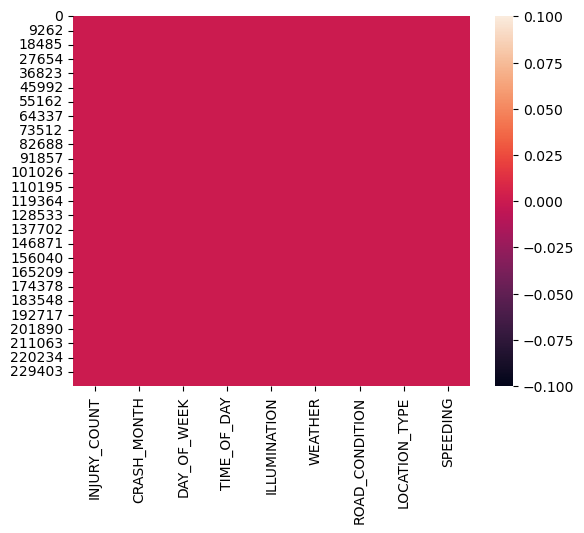

In [846]:
sns.heatmap(data=df2.isnull())
plt.show()

## Dealing with outliers

In [848]:
df2["INJURY_COUNT"].plot.box
plt.show()

In [849]:
df2.sort_values("INJURY_COUNT", ascending=False).head(50)

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
34670,44,10,3,905.0,1,2.0,1.0,0,0.0
43651,40,9,3,827.0,1,1.0,0.0,0,0.0
185231,30,9,4,737.0,1,3.0,1.0,0,0.0
177024,26,7,1,1740.0,1,2.0,1.0,0,0.0
47537,24,6,2,800.0,1,1.0,0.0,0,0.0
41471,21,6,2,840.0,1,1.0,0.0,0,0.0
64927,19,5,6,640.0,1,2.0,1.0,0,0.0
65048,16,6,4,1025.0,1,1.0,0.0,0,0.0
118890,16,12,3,850.0,1,4.0,5.0,0,0.0
138067,15,6,1,2326.0,3,2.0,1.0,0,0.0


Since the "INJURY_COUNT" column doesn't have a scale, I decided to keep the outliers because the data looks reasonable. The injury report doesn't look like it has extreme values.

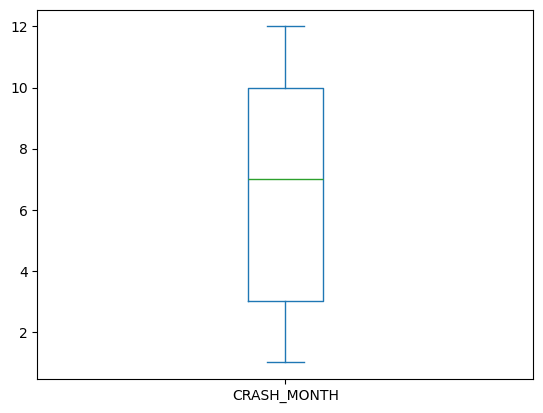

In [851]:
df2["CRASH_MONTH"].plot.box()
plt.show()

This boxplot does not show any outliers.

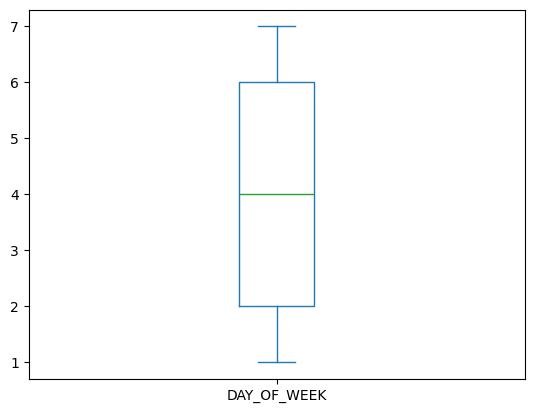

In [853]:
df2["DAY_OF_WEEK"].plot.box()
plt.show()

This boxplot does not show any outliers.

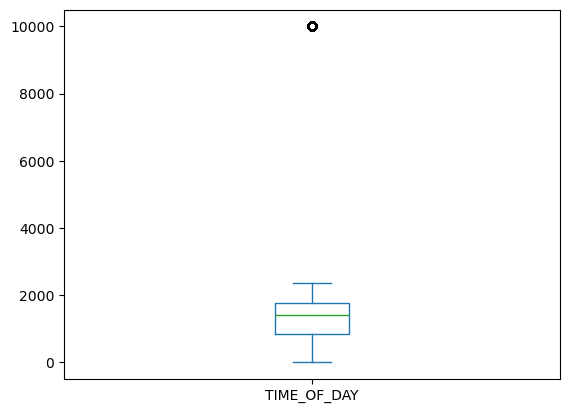

In [855]:
df2["TIME_OF_DAY"].plot.box()
plt.show()

This box plots shows outliers for "TIME_OF_DAY."

In [857]:
df2.sort_values("TIME_OF_DAY", ascending=False).head(50)

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
86698,1,4,1,9999.0,1,1.0,0.0,0,0.0
80280,0,10,2,9999.0,1,1.0,0.0,0,0.0
37163,0,2,7,9999.0,1,4.0,3.0,0,0.0
151537,2,9,6,9999.0,1,2.0,1.0,0,0.0
37219,0,2,3,9999.0,1,1.0,0.0,0,0.0
37224,1,2,2,9999.0,2,1.0,6.0,0,0.0
80193,1,9,6,9999.0,3,1.0,0.0,0,0.0
37237,1,2,7,9999.0,3,1.0,0.0,0,0.0
37244,1,1,7,9999.0,3,8.0,6.0,0,0.0
37255,0,1,3,9999.0,2,1.0,5.0,0,0.0


The time of day seems to be recorded in 24 hour time (starts at 0000 and goes to 2359). This means that we cannot have values of 9999. For this reason I dropped the rows containing this value (I assume it is due to missing time values, so instead of nulls they listed it as 9999).

In [859]:
df2 = df2.drop(df2[df2.TIME_OF_DAY == 9999].index)

This code was referenced from Youtube video "Delete Rows of pandas DataFrame Conditionally in Python (Example) | Remove & Drop Multiple & One Row" by Statistics Globe

Video link: https://www.youtube.com/watch?v=bEihdICCkgY

In [861]:
df2.sort_values("TIME_OF_DAY", ascending=False).head(50)

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
117714,2,11,7,2359.0,3,2.0,1.0,0,0.0
355,0,2,7,2359.0,2,4.0,5.0,0,0.0
206902,0,3,6,2359.0,3,3.0,1.0,0,0.0
205718,0,1,1,2359.0,3,10.0,7.0,0,0.0
101447,0,6,7,2359.0,2,1.0,0.0,0,0.0
52602,1,4,4,2359.0,2,1.0,0.0,0,0.0
172523,0,2,3,2359.0,3,1.0,0.0,0,0.0
231745,2,4,2,2359.0,3,3.0,1.0,0,0.0
121351,1,1,7,2359.0,3,4.0,3.0,0,0.0
118002,0,11,7,2359.0,3,1.0,0.0,0,0.0


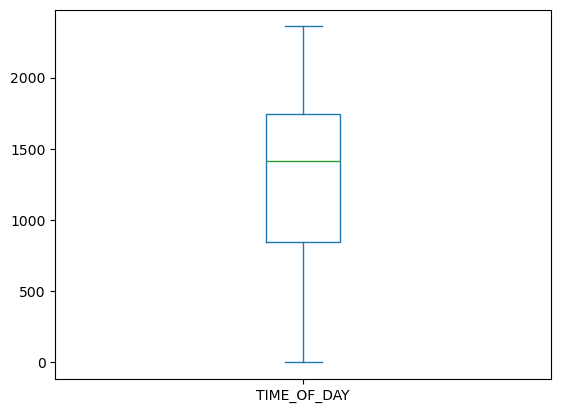

In [862]:
df2["TIME_OF_DAY"].plot.box()
plt.show()

The boxplot no longer shows outliers for "TIME_OF_DAY."

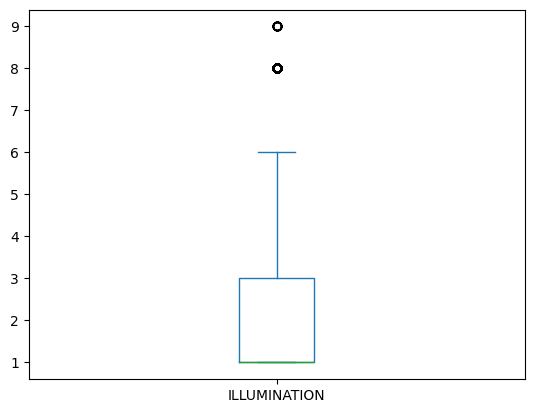

In [864]:
df2["ILLUMINATION"].plot.box()
plt.show()

This boxplot shows outliers for "ILLUMINATION."

In [866]:
df2.sort_values("ILLUMINATION", ascending=False).head(50)

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
35166,0,4,3,1345.0,9,1.0,0.0,0,0.0
6193,2,10,3,100.0,9,1.0,0.0,0,0.0
4960,0,6,6,1655.0,9,9.0,9.0,0,0.0
5435,0,8,3,711.0,9,1.0,0.0,0,0.0
47470,1,5,6,203.0,9,1.0,0.0,0,0.0
20431,2,1,4,1614.0,9,2.0,1.0,0,0.0
21545,1,8,5,202.0,9,1.0,0.0,0,0.0
4266,1,1,7,1658.0,9,2.0,1.0,0,0.0
6165,3,1,5,1130.0,9,4.0,3.0,0,0.0
5947,0,12,6,2000.0,9,9.0,9.0,7,0.0


The "ILLUMINATION" scale goes from 1 - 8, so I cannot remove outliers that contain the value 8. However, it seems like 9 was used for missing data or unknown data. For this reason I changed the rows that contained the value 9 to 8 since 8 is "Other."

In [868]:
def update_value(x):
    if x == 9:
        return 8
    else:
        return x

In [869]:
df2["ILLUMINATION"] = df["ILLUMINATION"].apply(lambda x: update_value(x))

In [870]:
df2.sort_values("ILLUMINATION", ascending=False).head(50)

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
35166,0,4,3,1345.0,8,1.0,0.0,0,0.0
235609,1,7,5,1546.0,8,3.0,1.0,4,0.0
134396,0,2,6,935.0,8,1.0,0.0,4,0.0
5947,0,12,6,2000.0,8,9.0,9.0,7,0.0
89434,1,7,2,2112.0,8,1.0,0.0,4,0.0
45223,1,10,2,1903.0,8,9.0,8.0,0,0.0
132118,0,12,1,1113.0,8,1.0,0.0,4,0.0
94140,0,11,3,1500.0,8,9.0,8.0,0,0.0
15623,1,6,5,207.0,8,1.0,0.0,0,0.0
63066,0,3,7,1620.0,8,1.0,0.0,4,0.0


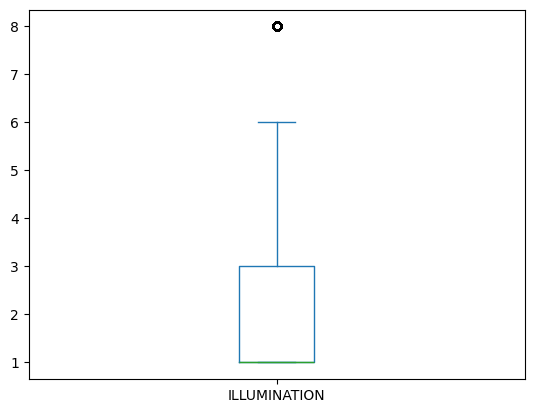

In [871]:
df2["ILLUMINATION"].plot.box()
plt.show()

The boxplot no longer shows the "9" outlier. The 8 outlier remains since it is part of the "ILLUMINATION" scale (1-8).

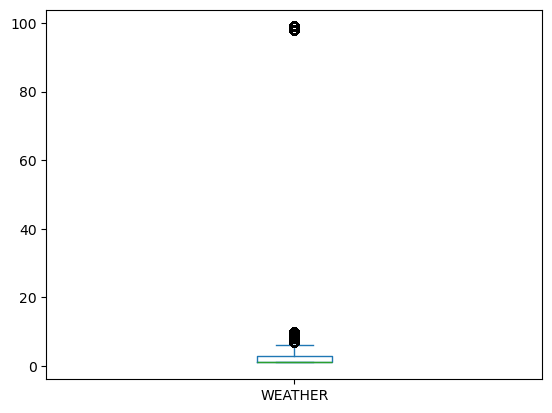

In [873]:
df2["WEATHER"].plot.box()
plt.show()

This boxplot shows outliers for "WEATHER."

In [875]:
df2.sort_values("WEATHER", ascending=False).head(50)

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
209102,1,5,2,1209.0,1,99.0,9.0,0,0.0
188778,1,10,1,2200.0,6,99.0,98.0,0,0.0
238419,0,12,2,1922.0,3,99.0,1.0,2,0.0
236040,1,10,2,1450.0,1,99.0,1.0,0,0.0
205949,4,2,6,2330.0,3,99.0,1.0,0,0.0
195335,0,1,2,1400.0,1,99.0,99.0,0,0.0
219304,0,3,4,1718.0,1,99.0,1.0,0,0.0
195321,1,1,5,1400.0,1,99.0,99.0,0,0.0
195955,0,2,2,317.0,3,99.0,1.0,0,0.0
218505,0,1,4,248.0,3,99.0,9.0,0,0.0


In [876]:
df2["WEATHER"].describe()

count    234612.000000
mean          2.290271
std           5.430696
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          99.000000
Name: WEATHER, dtype: float64

The outliers fall within range since the scale for "WEATHER" goes from 01 - 10, 98, 99. This means that the outliers don't have to be dropped.

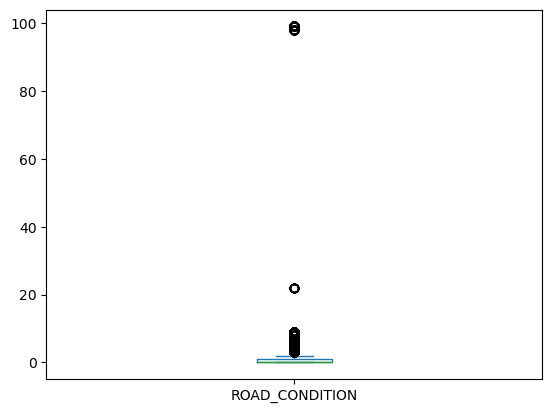

In [878]:
df2["ROAD_CONDITION"].plot.box()
plt.show()

This boxplot shows outliers for "ROAD_CONDITION."

In [880]:
df2.sort_values("ROAD_CONDITION", ascending=False).head(50)

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
223341,0,7,1,1403.0,1,7.0,99.0,0,0.0
187810,0,12,4,610.0,5,99.0,99.0,0,0.0
205060,0,1,5,0.0,6,3.0,99.0,7,0.0
196218,1,2,2,1041.0,1,99.0,99.0,0,0.0
227129,1,12,3,1400.0,1,98.0,99.0,7,0.0
206483,0,2,1,100.0,3,3.0,99.0,7,1.0
207940,0,4,6,2330.0,8,99.0,99.0,0,0.0
197625,1,4,6,1100.0,1,2.0,99.0,7,1.0
186952,1,12,2,1402.0,1,4.0,99.0,0,0.0
186949,0,12,1,1200.0,1,99.0,99.0,0,0.0


In [881]:
q = "ROAD_CONDITION > 9"
df2.query(q)

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
183248,0,8,6,2047.0,2,3.0,22.0,7,1.0
183300,1,7,4,1506.0,1,99.0,99.0,0,0.0
183556,0,8,3,1201.0,1,3.0,22.0,0,0.0
183715,2,8,7,1520.0,1,3.0,98.0,0,0.0
184253,1,7,5,1719.0,1,3.0,22.0,0,0.0
...,...,...,...,...,...,...,...,...,...
233529,0,7,6,40.0,6,3.0,99.0,0,0.0
235083,0,8,6,749.0,1,3.0,99.0,0,0.0
235847,1,9,6,1900.0,1,99.0,98.0,0,0.0
236771,3,10,3,640.0,5,99.0,99.0,0,0.0


In [882]:
df2["ROAD_CONDITION"].unique()

array([ 0.,  6.,  1.,  5.,  3.,  8.,  4.,  2.,  7.,  9., 22., 99., 98.])

In [883]:
df2["ROAD_CONDITION"].nunique()

13

The "ROAD_CONDITION" scale goes from 0 - 9, meaning the outliers for 22, 98, and 99 are not valid. I decided to change the values for 22, 98, and 99 to 9 because 9 represents the unknown values.

In [885]:
def update_value(x):
    if x == 22 or x == 98 or x == 99:
        return 9
    else:
        return x

In [886]:
df2["ROAD_CONDITION"] = df["ROAD_CONDITION"].apply(lambda x: update_value(x))

In [887]:
df2.sort_values("ROAD_CONDITION", ascending=False).head(50)

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
191095,0,3,1,225.0,2,7.0,9.0,0,0.0
204904,0,1,6,1342.0,1,7.0,9.0,0,0.0
204817,0,11,2,1728.0,3,7.0,9.0,0,0.0
204821,0,9,2,2210.0,3,98.0,9.0,0,0.0
229142,0,2,1,4.0,3,3.0,9.0,2,0.0
204828,0,12,3,1406.0,1,7.0,9.0,0,0.0
204832,0,4,3,1939.0,1,99.0,9.0,0,0.0
204835,0,4,6,608.0,1,99.0,9.0,0,0.0
204840,2,8,6,1709.0,1,7.0,9.0,0,0.0
229131,0,2,6,1515.0,1,3.0,9.0,0,0.0


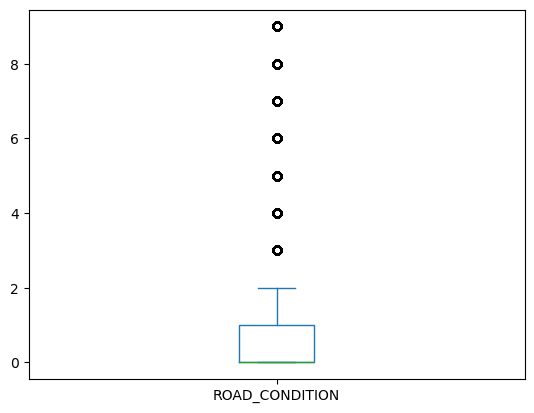

In [888]:
df2["ROAD_CONDITION"].plot.box()
plt.show()

This boxplot still shows outliers but they are within the range so the outliers can be kept.

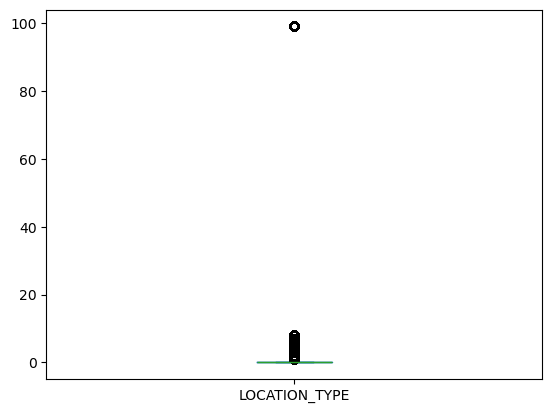

In [890]:
df2["LOCATION_TYPE"].plot.box()
plt.show()

This boxplot shows outliers for "LOCATION_TYPE."

In [892]:
df2.sort_values("LOCATION_TYPE", ascending=False).head(50)

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
152778,0,6,2,232.0,3,1.0,0.0,99,0.0
218723,0,3,4,850.0,1,10.0,7.0,99,0.0
192869,0,3,4,940.0,1,3.0,1.0,99,0.0
203876,0,12,6,2250.0,3,7.0,9.0,99,0.0
130803,0,11,7,1021.0,1,3.0,5.0,99,0.0
139327,0,7,7,119.0,2,1.0,0.0,99,1.0
206673,1,3,5,645.0,1,3.0,1.0,99,0.0
131884,0,12,2,1527.0,1,1.0,0.0,99,0.0
17237,2,2,4,1530.0,1,1.0,0.0,99,0.0
17236,1,1,7,555.0,2,1.0,0.0,99,1.0


In [893]:
df2["LOCATION_TYPE"].unique()

array([ 0, 99,  3,  7,  2,  1,  8,  4,  6,  5])

The "LOCATION_TYPE" scale goes from 0 - 9, so the outlier 99 is not valid because it is out of range. For this reason I changed 99 to 9 because 9 represents unknown values.

In [895]:
def update_value(x):
    if x == 22 or x == 98 or x == 99:
        return 9
    else:
        return x

In [896]:
df2["LOCATION_TYPE"] = df["LOCATION_TYPE"].apply(lambda x: update_value(x))

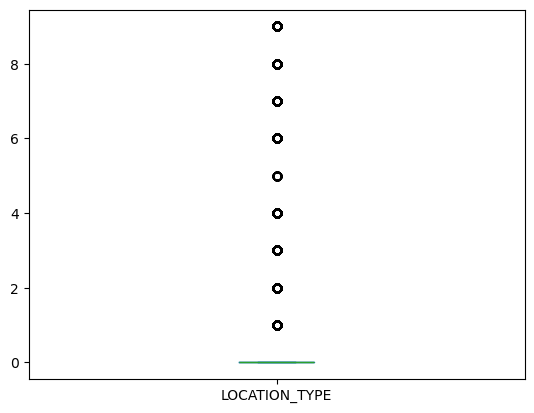

In [897]:
df2["LOCATION_TYPE"].plot.box()
plt.show()

This boxplot still shows outliers, but they are within the range so they can be kept.

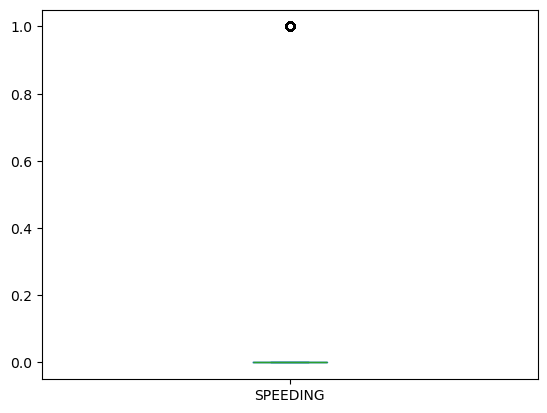

In [899]:
df2["SPEEDING"].plot.box()
plt.show()

This boxplot shows an outlier for "SPEEDING" but since the scale is 0 for not speeding and 1 for speeding, the outlier can be kept.

## Evaluating Distribution

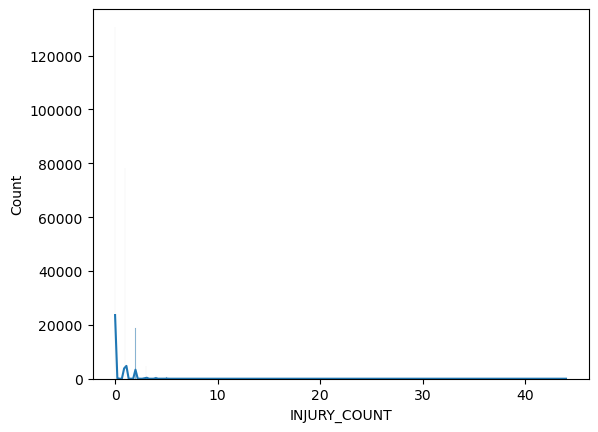

In [902]:
sns.histplot(data=df2, x="INJURY_COUNT", kde=True)
plt.show()

In [903]:
df2["INJURY_COUNT"] = df2["INJURY_COUNT"].apply(lambda x: np.sqrt(x))

The data looks to have a skewed distribution so I transformed the data.

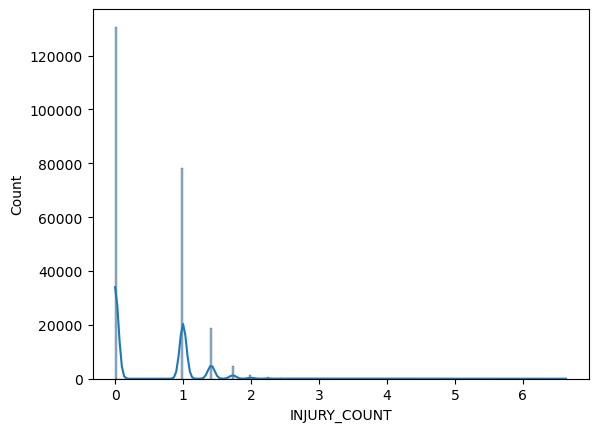

In [905]:
sns.histplot(data=df2, x="INJURY_COUNT", kde=True)
plt.show()

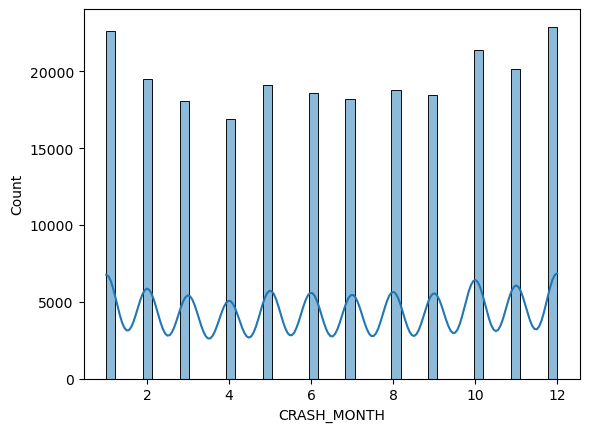

In [906]:
sns.histplot(data=df2, x="CRASH_MONTH", kde=True)
plt.show()

There is no need to transform this data since it is normally distributed.

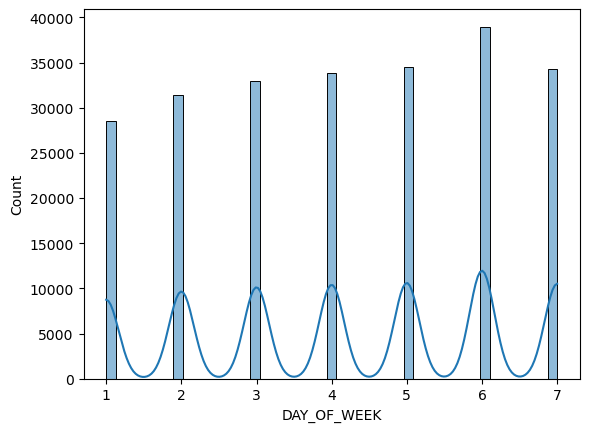

In [908]:
sns.histplot(data=df2, x="DAY_OF_WEEK", kde=True)
plt.show()

There is no need to transform the data because it is normally distributed.

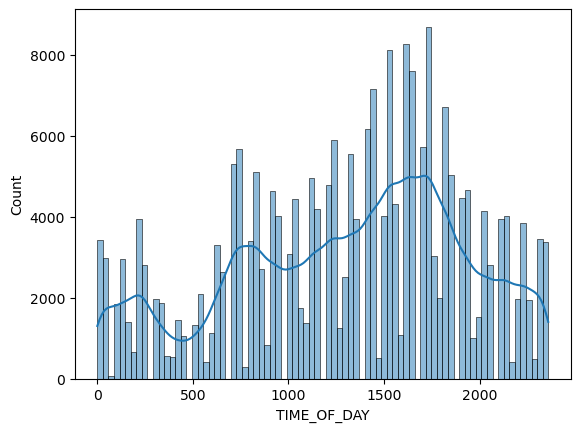

In [910]:
sns.histplot(data=df2, x="TIME_OF_DAY", kde=True)
plt.show()

There is no need to transform this data since it is somewhat normally distributed (it is not heavily skewed).

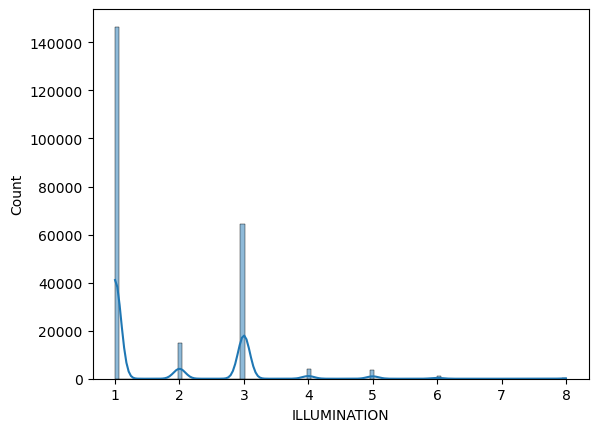

In [912]:
sns.histplot(data=df2, x="ILLUMINATION", kde=True)
plt.show()

This data looks skewed so I transformed the data.

In [914]:
df2["ILLUMINATION"] = df2["ILLUMINATION"].apply(lambda x: np.sqrt(x))

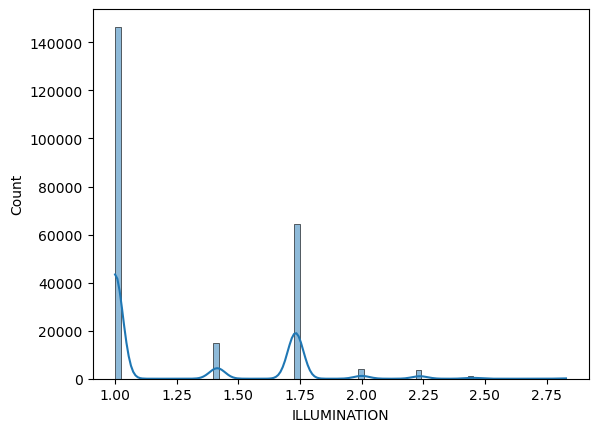

In [915]:
sns.histplot(data=df2, x="ILLUMINATION", kde=True)
plt.show()

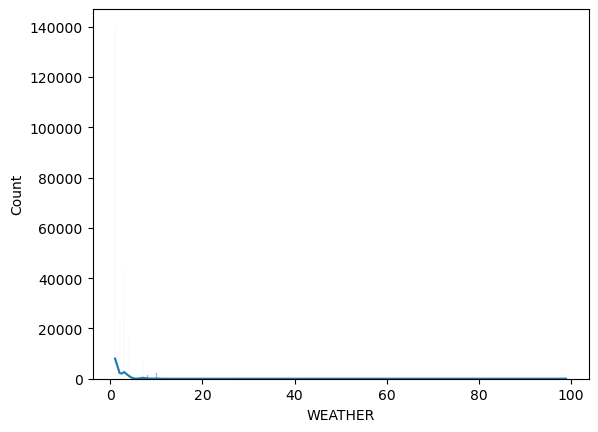

In [916]:
sns.histplot(data=df2, x="WEATHER", kde=True)
plt.show()

The data here looks skewed so I transformed it.

In [918]:
df2["WEATHER"] = df2["WEATHER"].apply(lambda x: np.sqrt(x))

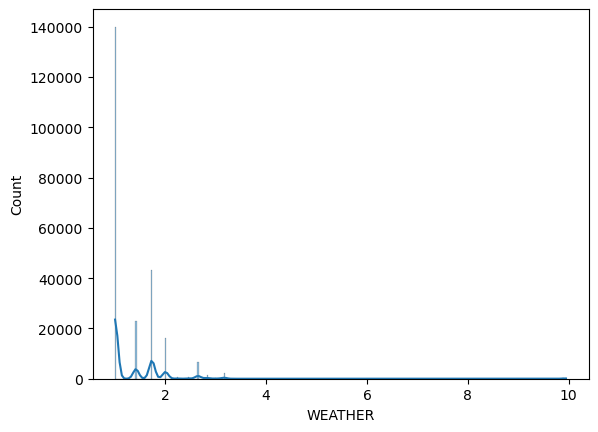

In [919]:
sns.histplot(data=df2, x="WEATHER", kde=True)
plt.show()

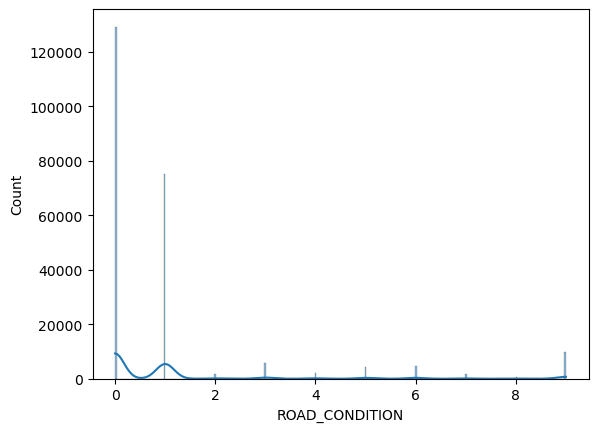

In [920]:
sns.histplot(data=df2, x="ROAD_CONDITION", kde=True)
plt.show()

The data looks to be skewed so I decided to transform the data.

In [922]:
df2["ROAD_CONDITION"] = df2["ROAD_CONDITION"].apply(lambda x: np.sqrt(x))

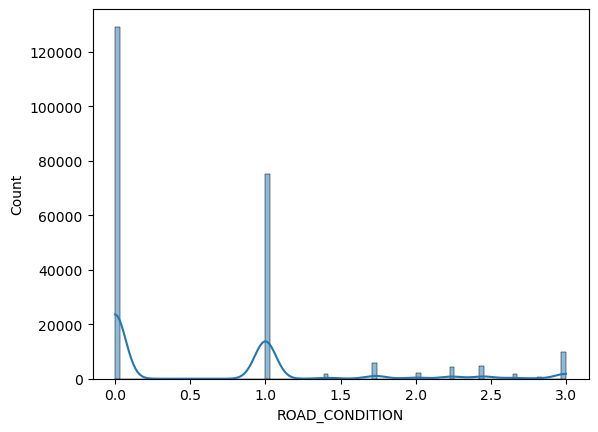

In [923]:
sns.histplot(data=df2, x="ROAD_CONDITION", kde=True)
plt.show()

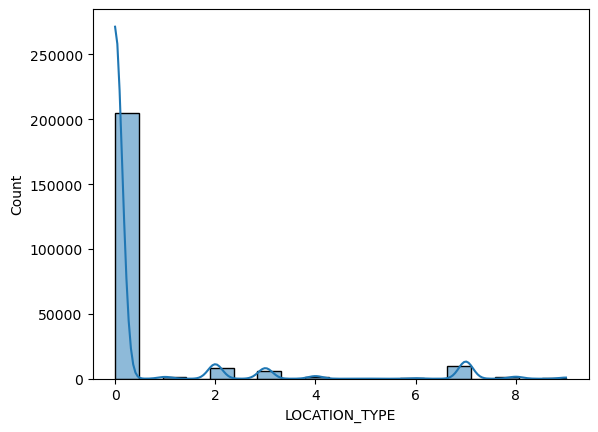

In [924]:
sns.histplot(data=df2, x="LOCATION_TYPE", kde=True)
plt.show()

The data looks skewed so I decided to transform the data.

In [926]:
df2["LOCATION_TYPE"] = df2["LOCATION_TYPE"].apply(lambda x: np.sqrt(x))

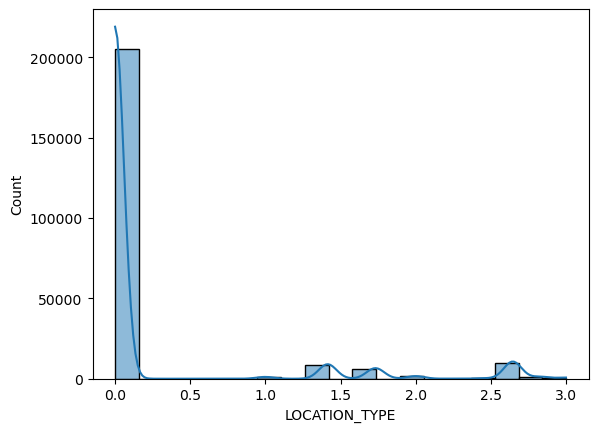

In [927]:
sns.histplot(data=df2, x="LOCATION_TYPE", kde=True)
plt.show()

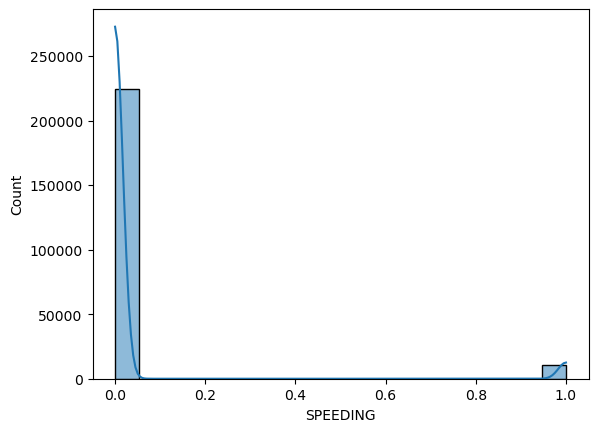

In [928]:
sns.histplot(data=df2, x="SPEEDING", kde=True)
plt.show()

Since the speeding data is a 0 or a 1, I decided not to transform the data. The column doesn't have enough numerical data that needs to be tranformed.

## Evaluating scale of numeric features

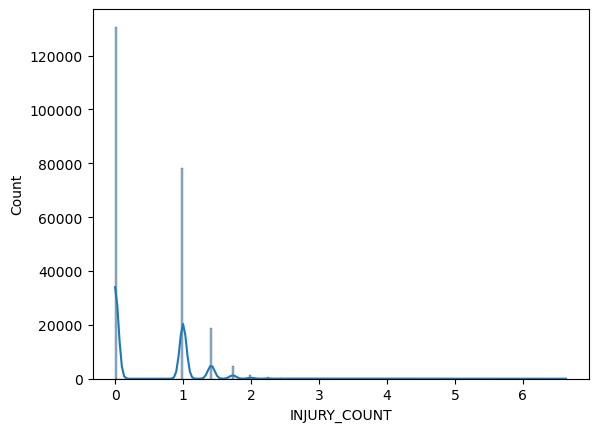

In [931]:
sns.histplot(data=df2, x="INJURY_COUNT", kde=True)
plt.show()

The data for "INJURY_COUNT" does not have large values that could affect other data. For this reason I didn't change it.

In [933]:
df2["INJURY_COUNT"].min()

0.0

In [934]:
df2["INJURY_COUNT"].max()

6.6332495807108

I am only able to show this plot because "INJURY_COUNT" is the only true numerical variable. The other predictor variables like "CRASH_MONTH", "ROAD_CONDITION", etc. are categorical/ordinal variables.

## Visualizing Relationships Among Variables

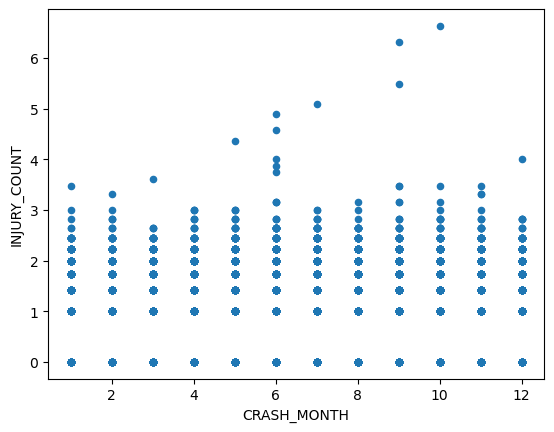

In [1200]:
df2.plot(kind = "scatter", x = "CRASH_MONTH", y = "INJURY_COUNT")
plt.show()

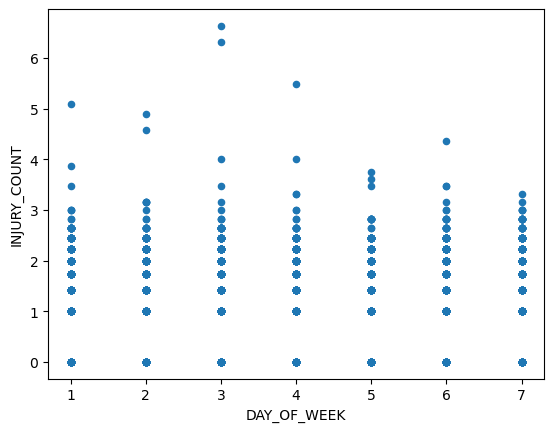

In [1202]:
df2.plot(kind = "scatter",  x = "DAY_OF_WEEK", y = "INJURY_COUNT")
plt.show()

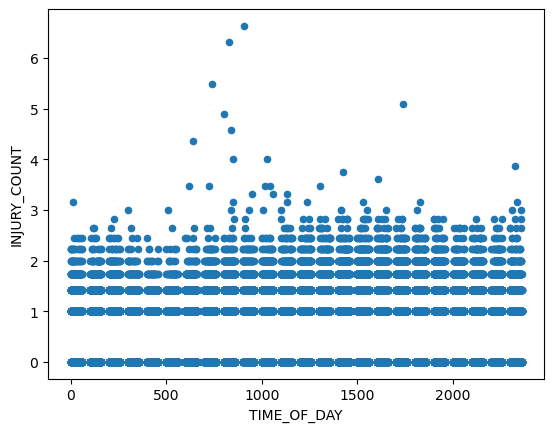

In [1204]:
df2.plot(kind = "scatter",  x = "TIME_OF_DAY", y = "INJURY_COUNT")
plt.show()

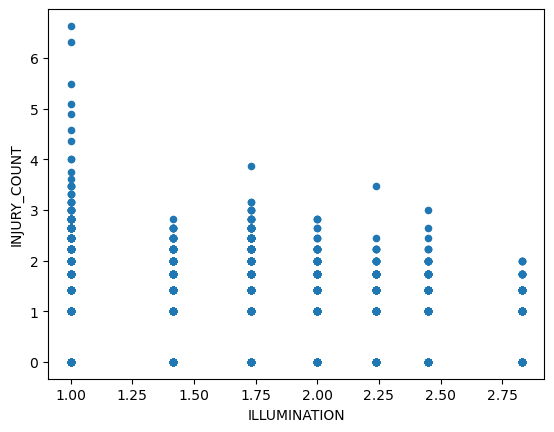

In [1206]:
df2.plot(kind = "scatter",  x = "ILLUMINATION", y = "INJURY_COUNT")
plt.show()

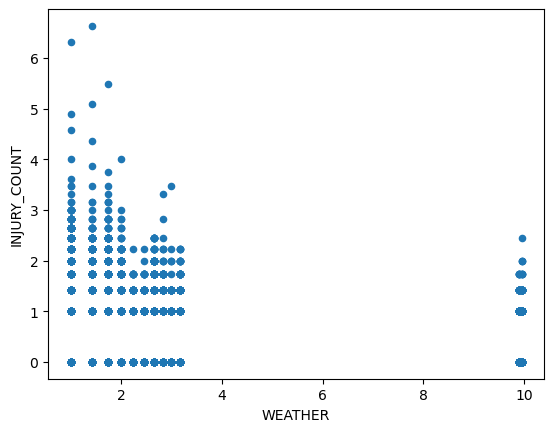

In [1208]:
df2.plot(kind = "scatter",  x = "WEATHER", y = "INJURY_COUNT")
plt.show()

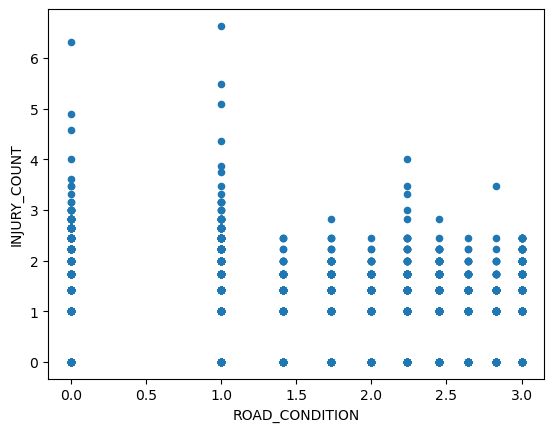

In [1210]:
df2.plot(kind = "scatter",  x = "ROAD_CONDITION", y = "INJURY_COUNT")
plt.show()

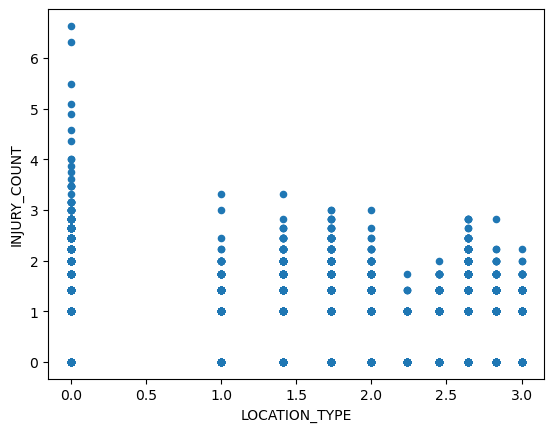

In [1212]:
df2.plot(kind = "scatter",  x = "LOCATION_TYPE", y = "INJURY_COUNT")
plt.show()

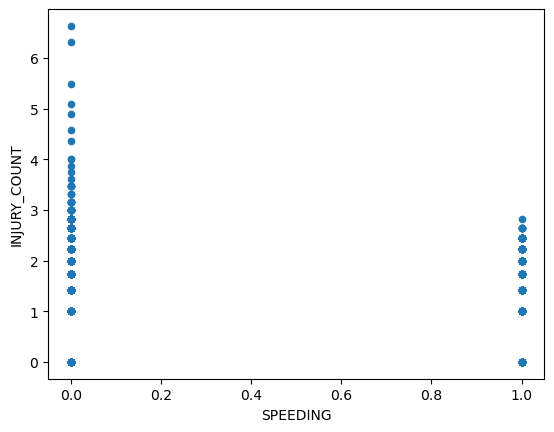

In [1214]:
df2.plot(kind = "scatter",  x = "SPEEDING", y = "INJURY_COUNT")
plt.show()

None of these scatter plots show a linear relationship.

Since I was trying to do a regression model, I wanted to see the relationship between the variables using scatter plots. However, this can only be done with numerical variables which unfortunately I am not using. I think I may have to choose different variables if I am going to make this predictive model work.

## Feature Selection

### List of Features
- I plan on using "INJURY_COUNT", "CRASH_MONTH", "DAY_OF_WEEK", "TIME_OF_DAY", "ILLUMINATION", "WEATHER", "ROAD_CONDITION", "LOCATION_TYPE", and "SPEEDING" as my features.

### Justification
- I am using these particular features because I believe these are the most/some of the most important variables when it comes to car crashes and the outcomes of them. Variables like the weather or the road condition can be helpful in predicting how bad a crash might be.

### Descriptive Statistics for Each Feature

In [950]:
df2["INJURY_COUNT"].describe()

count    234612.000000
mean          0.501397
std           0.588589
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.633250
Name: INJURY_COUNT, dtype: float64

In [951]:
df2["CRASH_MONTH"].describe()

count    234612.000000
mean          6.584092
std           3.561549
min           1.000000
25%           3.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: CRASH_MONTH, dtype: float64

In [952]:
df2["DAY_OF_WEEK"].describe()

count    234612.000000
mean          4.144277
std           1.968413
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           7.000000
Name: DAY_OF_WEEK, dtype: float64

In [953]:
df2["TIME_OF_DAY"].describe()

count    234612.000000
mean       1307.864052
std         607.533971
min           0.000000
25%         845.000000
50%        1414.000000
75%        1748.000000
max        2359.000000
Name: TIME_OF_DAY, dtype: float64

In [954]:
df2["ILLUMINATION"].describe()

count    234612.000000
mean          1.272812
std           0.374383
min           1.000000
25%           1.000000
50%           1.000000
75%           1.732051
max           2.828427
Name: ILLUMINATION, dtype: float64

In [955]:
df2["WEATHER"].describe()

count    234612.000000
mean          1.358528
std           0.666840
min           1.000000
25%           1.000000
50%           1.000000
75%           1.732051
max           9.949874
Name: WEATHER, dtype: float64

In [956]:
df2["ROAD_CONDITION"].describe()

count    234612.000000
mean          0.628774
std           0.835390
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: ROAD_CONDITION, dtype: float64

In [957]:
df2["LOCATION_TYPE"].describe()

count    234612.000000
mean          0.253111
std           0.700083
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: LOCATION_TYPE, dtype: float64

In [958]:
df2["SPEEDING"].describe()

count    234612.000000
mean          0.043881
std           0.204831
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SPEEDING, dtype: float64

### Predictors and Response Variables
- The "CRASH_MONTH", "DAY_OF_WEEK", "TIME_OF_DAY", "ILLUMINATION", "WEATHER", "ROAD_CONDITION", "LOCATION_TYPE", and "SPEEDING" variables are the predictor variables. The response variable is "INJURY_COUNT."

### Issues and Descriptions for the Issues

I had issues with data being added in the dataset in strange ways. I addressed it earlier in the EDA but some values were listed as 98 or 99 for example, even though the data dictionary stated that the data would be labeled from 0 - 9. I found this strange and initially wanted to drop the values, but I was instructed to switch the values from 99 to 9 since 9 was normally the "unknown" value in the data dictionary. 

I unfortunately had issues with the variable relationship section that I need guidance on. I know that I can't use scatter plots for my variables, but for regression models I need to be able to see if the relationship between the variables is linear. I would appreciate feedback on this. 

# Final Project

### Problem:
The problem I was trying to solve was if it is possible to  predict the total number of injuries suffered by people in a car crash. 

### Approach
My approach to the problem was to filter out my dataset to look at features "CRASH_MONTH", "DAY_OF_WEEK", "TIME_OF_DAY", "ILLUMINATION", "WEATHER", "ROAD_CONDITION", "LOCATION_TYPE", and "SPEEDING" to predict "INJURY_COUNT." I wanted to use a regression model to predict this outcome.

### Dataset
My dataset is called "Cumulative Crash Data" which contains data from car crashes reported to the Allegheny County police department from 2004 to 2022. The dataset is from the Western Pennsylvania Regional Data Center (WPRDC). This is the link to the dataset https://data.wprdc.org/dataset/allegheny-county-crash-data/resource/2c13021f-74a9-4289-a1e5-fe0472c89881

### Data Analysis
In my EDA I cover missing values for my variables, I look for outliers, I try to graph my variables to look for the distrbutions, I try to standardize/scale my variables when I need to, etc. I dropped the rows that contained missing values since there were so few. Then I tried to look for outliers and deal with them. For outliers I originally tried to drop values that seemed like they were out of range, but the professor suggested I keep them in so I did (with slight alterations to the data). I then tried to graph the variables to see what they looked like. For any variables that didn't look like they had a normal distribution, like "LOCATION_TYPE" for example, I tried to center and scale the data. 

### Work Split Up
Since this was an individual assignment all of the work here was done by me.

### EDA Fixes
My EDA did not receive feedback on anything that I needed to fix or correct.

# First Machine Learning Model - Multivariable Regression

I picked multivariable regression for my first machine learning model because it is good for predicting numerical variables and uses multiple x variables to predict the y variable.

In [488]:
df2.dtypes

INJURY_COUNT      float64
CRASH_MONTH         int64
DAY_OF_WEEK         int64
TIME_OF_DAY       float64
ILLUMINATION      float64
WEATHER           float64
ROAD_CONDITION    float64
LOCATION_TYPE     float64
SPEEDING          float64
dtype: object

In [1078]:
# Defining X and y
X = df2[["CRASH_MONTH", "DAY_OF_WEEK", "TIME_OF_DAY", "ILLUMINATION", "WEATHER", "ROAD_CONDITION", "LOCATION_TYPE", "SPEEDING"]]
y = df2["INJURY_COUNT"]

In [490]:
# Split Data
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [491]:
# Train Model
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [139]:
# Coefficients of the model
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for CRASH_MONTH is -0.0003080788595457979
The coefficient for DAY_OF_WEEK is -0.0017706520510769174
The coefficient for TIME_OF_DAY is 4.464445238513943e-05
The coefficient for ILLUMINATION is -0.09120597199193042
The coefficient for WEATHER is -0.021026539899668024
The coefficient for ROAD_CONDITION is -0.04490930647253905
The coefficient for LOCATION_TYPE is 0.004919322604099578
The coefficient for SPEEDING is 0.12680850827301157


In [240]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.6182821964101155


yhat = 0.618 + (-0.0003)x + (-0.0017)x + 4.4644x + (-0.0912)x + (-0.0210)x + (-0.0449)x + (0.0049)x + (0.1268)x

In [333]:
new_val = [[5, 2, 914.0, 1, 1, 18, 7, 0]]
regression_model.predict(new_val)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.23215924])

In [335]:
# Finding R^2
regression_model.score(X_test, y_test)

0.015688720846579463

This score shows that my regression model is not good at predicting the number of injuries since the score is so low.

In [266]:
df2["INJURY_COUNT"].var()

0.3464366802247059

In [268]:
df2["INJURY_COUNT"].std()

0.5885887190770019

In [272]:
# Finding Adjusted R^2
import statsmodels.formula.api as sm
lm = sm.ols(formula='INJURY_COUNT ~ CRASH_MONTH + DAY_OF_WEEK + TIME_OF_DAY + ILLUMINATION + WEATHER + ROAD_CONDITION + LOCATION_TYPE + SPEEDING', data=df2)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           INJURY_COUNT   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     448.8
Date:                Sun, 20 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:17:06   Log-Likelihood:            -2.0677e+05
No. Observations:              234612   AIC:                         4.136e+05
Df Residuals:                  234603   BIC:                         4.136e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6162      0.006     95.291      0.000       0.604       0.629
CRASH_MONTH       -0.0005      0.000     -1.435      0.151      -0.001       0.000
DAY_OF_WEEK       -0.0018      0.001     -2.891      0.004      -0.003      -0.001
TIME_OF_DAY     4.555e-05   1.99e-06     22.887      0.000    4.16e-05    4.95e-05
ILLUMINATION      -0.0888      0.003    -27.324      0.000      -0.095      -0.082
WEATHER           -0.0207      0.002     -8.891      0.000      -0.025      -0.016
ROAD_CONDITION    -0.0468      0.002    -25.012      0.000      -0.050      -0.043
LOCATION_TYPE      0.0055      0.002      3.196      0.001       0.002       0.009
SPEEDING           0.1220      0.006     20.627      0.000       0.110       0.134
==============================================================================
Omnibus:                    33821.265   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19077.294
Skew:                           0.562   Prob(JB):                         0.00
Kurtosis:                       2.170   Cond. No.                     8.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [274]:
# Calculating MSE
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

print(y_predict)
print(y_test)
regression_model_mse = mean_squared_error(y_predict, y_test)

print(regression_model_mse)

[0.57210876 0.45540025 0.53280574 ... 0.452366   0.57074325 0.44810347]
129336    1.414214
218641    0.000000
20808     1.000000
110524    0.000000
80279     0.000000
            ...   
11623     1.000000
180798    0.000000
217546    0.000000
97231     0.000000
12007     0.000000
Name: INJURY_COUNT, Length: 46923, dtype: float64
0.3405533667170551


In [276]:
# Calculating RMSE
import math

math.sqrt(regression_model_mse)

0.5835695046153929

Since the RMSE value is high, it shows that this model is not accurate at predicting the "INJURY_COUNT."

In [1050]:
df2.sample()

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING
151193,0.0,8,5,710.0,1.0,1.0,1.0,0.0,0.0


In [1056]:
# Making a prediction based on known values

# INJURY_COUNT: 0
# CRASH_MONTH: 8
# DAY_OF_WEEK: 5
# TIME_OF_DAY: 710.0
# ILLUMINATION: 1.0
# WEATHER: 1.0
# ROAD_CONDITION: 1.0
# LOCATION_TYPE: 0.0
# SPEEDING: 0.0

new_data = [[8, 5, 710.0, 1.0, 1.0, 1.0, 0.0, 0.0]]
regression_model.predict(new_data)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.48152005])

In [1058]:
# Now using unknown values to predict the number of injuries.
new_data = [[10, 3, 510.0, 1.0, 1.0, 1.0, 0.0, 1.0]]
regression_model.predict(new_data)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.60232481])

# Evaluation: 
Overall the multivariable regression was not a good model for predicting "INJURY_COUNT." I can tell it is not a good model because the regression score was low, the RMSE was high, and when I tried to predict a known injury count from known values the prediction was off. The model got a 0.015 score with a 0.58 RMSE value. I think that the reason that this model didn't perform well was because the predictors aren't good at predicting the target variable. If I had selected different predictor variables, I think the model would have done better.

# Second Machine Learning Model - Decision Tree

For the second machine learning model I used a decision tree because decision tree models are good for predicting numerical data by filtering the data. This should hopefully produce better results than the previous multivariable regression model.

In [1080]:
# Defining X and y
X = df2[["CRASH_MONTH", "DAY_OF_WEEK", "TIME_OF_DAY", "ILLUMINATION", "WEATHER", "ROAD_CONDITION", "LOCATION_TYPE", "SPEEDING"]]
y = df2["INJURY_COUNT"]

In [1082]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [1149]:
from sklearn.tree import DecisionTreeRegressor

# instantiate model
model = DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

# fit model
model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

In [1151]:
# make class predictions for the testing set
y_pred_class = model.predict(X_test)
y_pred_class

array([0.53706598, 0.37979679, 0.53706598, ..., 0.53706598, 0.53706598,
       0.4150956 ])

In [1153]:
pred_df = pd.concat([df2, pd.Series(y_pred_class)], axis=1)
pred_df.head()

,INJURY_COUNT,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,LOCATION_TYPE,SPEEDING,0
0,0.0,1.0,5.0,257.0,1.414214,1.0,0.00000,0.0,0.0,0.537066
1,1.0,1.0,5.0,1027.0,1.000000,1.0,2.44949,0.0,0.0,0.379797
2,1.0,1.0,5.0,1839.0,1.414214,1.0,0.00000,0.0,0.0,0.537066
3,1.0,1.0,6.0,914.0,1.000000,1.0,1.00000,0.0,0.0,0.537066
4,0.0,1.0,5.0,2230.0,1.732051,1.0,0.00000,0.0,0.0,0.415096


In [1155]:
# calculate accuracy
from sklearn import metrics
#print(metrics.accuracy_score(y_test, y_pred_class))
print(model.score(X_test, y_test))

0.012658911136845141


This decision tree score shows that it did not do a good job at predicting the "INJURY_COUNT" since the score is low. We wanted to see a score close to 1 but the score is showing 0.012.

# Evaluation: 
This model was also not good at predicting the "INJURY_COUNT" since the model's score was low. It seems so far that the x variables chosen are not good predictors for the target variable. The model got a 0.012 score. Again, I think this model performed poorly because the predictors chosen are not good for predicting the target variable.

# Third Machine Learning Model - Random Forest

For the third machine learning model I am using a random forest model to see if it performs better than the decision tree model. I don't know if it will perform much better because a random forest model is built off of multiple decision trees, but it should make better predictions compared to the previous model.

In [1168]:
# Defining X and y
X = df2[["CRASH_MONTH", "DAY_OF_WEEK", "TIME_OF_DAY", "ILLUMINATION", "WEATHER", "ROAD_CONDITION", "LOCATION_TYPE", "SPEEDING"]]
y = df2["INJURY_COUNT"]

In [1170]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [1172]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model
model = RandomForestRegressor(random_state=1, max_depth=10)

# fit model
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [1174]:
# make estimations for the testing set
y_pred = model.predict(X_test)
y_pred

array([0.54896323, 0.36092622, 0.52015599, ..., 0.45075551, 0.54695964,
       0.36413977])

In [1176]:
from sklearn import metrics
print(model.score(X_test, y_test))

0.019673561721078148


This score shows that this model was also not good at predicting the target variable. It did perform better than the decision tree model, but it still did not do a good job as a predictive model.

In [1178]:
features = X.columns
print(features)
importances = model.feature_importances_
print(importances)

Index(['CRASH_MONTH', 'DAY_OF_WEEK', 'TIME_OF_DAY', 'ILLUMINATION', 'WEATHER',
       'ROAD_CONDITION', 'LOCATION_TYPE', 'SPEEDING'],
      dtype='object')
[0.10461754 0.07293062 0.40189909 0.05735016 0.10347687 0.16528769
 0.04240396 0.05203407]


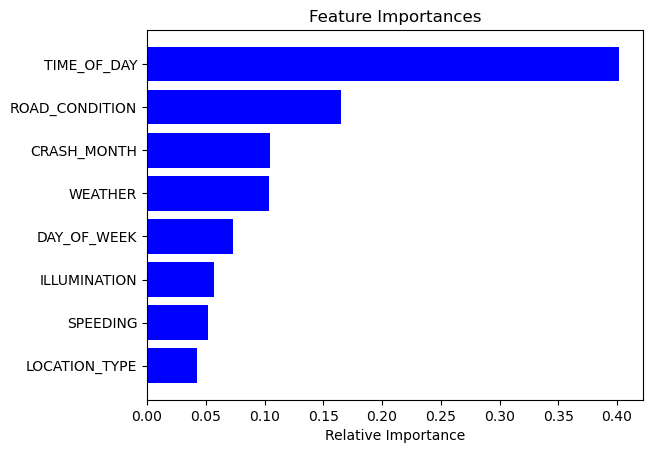

In [1180]:
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to this bar chart, "TIME_OF_DAY" is the only variable the seems to be important when it comes to predicting the "INJURY_COUNT." The other variables don't seem to make as much of an impact on the outcome compared to "TIME_OF_DAY."

# Evaluation:
This model did not perform much better than the others. It performed better than the Decision Tree model, but it's still not a good model to predict the "INJURY_COUNT." The model got a 0.019 score. Similar to the previous two models, I think this model performed poorly because the predictors are not good at predicting the target variable. The bar chart actually confirms this idea since all but one variable seem to have small bars when it comes to importance.

# Best Model:
The best performing model was the Random Forest model because it had the highest score of 0.019.

# Conclusion:

### Lessons learned: 
I learned that people must account for multiple different factors when trying to make machine learning models. One of those factors is picking the right predictor variables for the the target variable. Since my models did not do a good job at predicting the target, selecting new predictors might make the models perform better. Overall though, I learned about data cleaning, looking for outliers, graphing the relationships between variables, and so on. 

### Usefulness of Best Performing Model: 
The best performing model was the Random Forest model. This model is not useful in terms of its accuracy, but it shows which predictors are **NOT** good for predicting the "INJURY_COUNT." This can be used by DMVs, for example, to use different predictors when they are trying to make their own models.

### Why the Best Performing Model is the Best: 
The best performing model was the Random Forest model because it had the best score. It uses multiple decision trees to split the data and predict the outcome based on those multiple splits. The model still performed poorly, but it was more accurate compared to the Decision Tree model and the Multivariable Regression model. 

### Limitations of my work:
I would say that I was limited by the predictors I chose. The predictors were not useful when trying to predict the target variable which made the models perform poorly. I think if I had chosen different predictors, the outcome would have been different. Other than that, I thought everything else was fine. I didn't have many issues throughout the project.

### Citations:
All work was done by using materials provided to the students by the professor. I also used a YouTube video for a specfic dropping columns problem (this is the link for the video https://www.youtube.com/watch?v=bEihdICCkgY).